In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# Loading the Variable

In [2]:
case_data = pd.read_excel('data.xlsx', sheet_name= 'data')

In [3]:
case_field_data = pd.read_excel('data.xlsx', sheet_name= 'fields summary')

In [4]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
case_data.head(10)

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_7,engineTransmission_engineOil_cc_value_8,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_7,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_engine_cc_value_10,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,NaN,NaN,NaN,NaN,NaN,NaN,No,Repaired,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Water Pump Brg Noise,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,No,White,No,Back Compression Exist,No,Spongy,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,Leakage from Sump/chamber,NaN,NaN,NaN,NaN,NaN,No,RPM fluctuating,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,Yes,NaN,No,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,NaN,NaN,No,Noise from silencer assembly,Yes,NO Blow-by,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Dirty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Dirty,NaN,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Engine Auxiliary Noise,NaN,NaN,NaN,NaN,No,Black,Yes,Perm. Blow By on idle,No,Hard,S

In [5]:
case_field_data

,Columns,Description,Variable
0,appointmentId,Unique id,Independent
1,inspectionStartTime,inspection date,Independent
2,year,registration year,Independent
3,month,registration month,Independent
4,engineTransmission_battery_value,condition ok: yes\nelse : no,Independent
5,engineTransmission_battery_cc_value_0,current condition if not yes,Independent
6,engineTransmission_battery_cc_value_1,current condition if not yes,Independent
7,engineTransmission_battery_cc_value_2,current condition if not yes,Independent
8,engineTransmission_battery_cc_value_3,current condition if not yes,Independent
9,engineTransmission_battery_cc_value_4,current condition if not yes,Independent


# Exploratory Data Analysis (EDA)

In [6]:
# Null Value Detection
case_data.isna().sum()

appointmentId                                                    0
inspectionStartTime                                              0
year                                                             0
month                                                            0
engineTransmission_battery_value                                 0
engineTransmission_battery_cc_value_0                        22869
engineTransmission_battery_cc_value_1                        25877
engineTransmission_battery_cc_value_2                        26235
engineTransmission_battery_cc_value_3                        26291
engineTransmission_battery_cc_value_4                        26303
engineTransmission_engineoilLevelDipstick_value                  0
engineTransmission_engineOilLevelDipstick_cc_value_0         25896
engineTransmission_engineOil                                     0
engineTransmission_engineOil_cc_value_0                       7750
engineTransmission_engineOil_cc_value_1                      1

In [7]:
# Null Value Percentage
Null_value_perc = ((case_data.isna().sum()/case_data.isna().count())*100).round(2).reset_index()

In [8]:
Null_value_perc.rename(columns = {'index' : 'parameter', 0 : 'nv_perc'},inplace = True)

In [9]:
Null_value_perc

,parameter,nv_perc
0,appointmentId,0.00
1,inspectionStartTime,0.00
2,year,0.00
3,month,0.00
4,engineTransmission_battery_value,0.00
5,engineTransmission_battery_cc_value_0,86.93
6,engineTransmission_battery_cc_value_1,98.37
7,engineTransmission_battery_cc_value_2,99.73
8,engineTransmission_battery_cc_value_3,99.94
9,engineTransmission_battery_cc_value_4,99.98


In [10]:
# Keeping the Threshold at 40%. Removing the varaibles which have null values percentage more than 40%

case_variable = Null_value_perc[Null_value_perc['nv_perc'] <= 40].reset_index(drop = True)

In [11]:
case_variable

,parameter,nv_perc
0,appointmentId,0.00
1,inspectionStartTime,0.00
2,year,0.00
3,month,0.00
4,engineTransmission_battery_value,0.00
5,engineTransmission_engineoilLevelDipstick_value,0.00
6,engineTransmission_engineOil,0.00
7,engineTransmission_engineOil_cc_value_0,29.46
8,engineTransmission_engine_value,0.00
9,engineTransmission_coolant_value,0.00


### Deeper dive in engineTransmission_engineOil_cc_value_0


In [12]:
case_data['engineTransmission_engineOil_cc_value_0'].unique()

array(['Leaking', 'Dirty', nan, 'Level Low', 'Leakage from Turbo Charger',
       'Leakage from Tappet Cover', 'Leakage from Side cover',
       'Leakage from Sump/chamber', 'Low Pressure warning light glowing',
       'Mixed with Coolant'], dtype=object)

In [13]:
# Replacing the nan values with the mode of the columns
case_data['engineTransmission_engineOil_cc_value_0'] = case_data['engineTransmission_engineOil_cc_value_0'].replace(np.nan , case_data['engineTransmission_engineOil_cc_value_0'].mode()[0])

In [14]:
(case_data['engineTransmission_engineOil_cc_value_0'].value_counts() / case_data['engineTransmission_engineOil_cc_value_0'].count())*100

Leaking                               59.459459
Dirty                                 26.251568
Level Low                             10.411678
Leakage from Tappet Cover              2.721709
Leakage from Side cover                0.840081
Leakage from Sump/chamber              0.190063
Leakage from Turbo Charger             0.117839
Mixed with Coolant                     0.003801
Low Pressure warning light glowing     0.003801
Name: engineTransmission_engineOil_cc_value_0, dtype: float64

In [15]:
# Binning the variable in 3 categories : Leaking , Dirty , Others

case_data['engineTransmission_engineOil_cc_value_0'] = case_data['engineTransmission_engineOil_cc_value_0'].apply(lambda x : 'Others' if  x not in ['Leaking','Dirty'] else x )

In [16]:
(case_data['engineTransmission_engineOil_cc_value_0'].value_counts() / case_data['engineTransmission_engineOil_cc_value_0'].count())*100

Leaking    59.459459
Dirty      26.251568
Others     14.288973
Name: engineTransmission_engineOil_cc_value_0, dtype: float64

### Deeper dive in engineTransmission_engineOil_cc_value_0

In [17]:
case_data['engineTransmission_engineSound_cc_value_0'].unique()

array(['Alternator Brg Noise', 'Timing Noise', nan, 'Tappet Noise',
       'Injector Noise', 'Engine Auxiliary Noise',
       'Whistling Noise-Turbo', 'Water Pump Brg Noise'], dtype=object)

In [18]:
# Replacing the nan values with the mode of the columns
case_data['engineTransmission_engineSound_cc_value_0'] = case_data['engineTransmission_engineSound_cc_value_0'].replace(np.nan , case_data['engineTransmission_engineOil_cc_value_0'].mode()[0])

In [19]:
(case_data['engineTransmission_engineSound_cc_value_0'].value_counts() / case_data['engineTransmission_engineSound_cc_value_0'].count())*100

Timing Noise              31.056373
Leaking                   27.471776
Tappet Noise              14.954195
Alternator Brg Noise      14.064698
Whistling Noise-Turbo      6.405139
Engine Auxiliary Noise     3.557988
Water Pump Brg Noise       1.550918
Injector Noise             0.938914
Name: engineTransmission_engineSound_cc_value_0, dtype: float64

In [20]:
# Binning the variable in 3 categories : Timing Noise , Leaking , Tappet Noise, Alternator Brg Noise , Others

case_data['engineTransmission_engineSound_cc_value_0'] = case_data['engineTransmission_engineSound_cc_value_0'].apply(lambda x : 'Others' if  x not in ['Timing Noise' , 'Leaking' , 'Tappet Noise', 'Alternator Brg Noise'] else x )

In [21]:
(case_data['engineTransmission_engineSound_cc_value_0'].value_counts() / case_data['engineTransmission_engineSound_cc_value_0'].count())*100

Timing Noise            31.056373
Leaking                 27.471776
Tappet Noise            14.954195
Alternator Brg Noise    14.064698
Others                  12.452959
Name: engineTransmission_engineSound_cc_value_0, dtype: float64

In [22]:
# Considering only the shortlisted variables for further steps

In [23]:
case_data = case_data[list(case_variable['parameter'])]

In [24]:
case_data_copy = case_data.copy()

In [25]:
case_data.dtypes

appointmentId                                                        object
inspectionStartTime                                          datetime64[ns]
year                                                                  int64
month                                                                 int64
engineTransmission_battery_value                                     object
engineTransmission_engineoilLevelDipstick_value                      object
engineTransmission_engineOil                                         object
engineTransmission_engineOil_cc_value_0                              object
engineTransmission_engine_value                                      object
engineTransmission_coolant_value                                     object
engineTransmission_engineMounting_value                              object
engineTransmission_engineSound_value                                 object
engineTransmission_engineSound_cc_value_0                            object
engineTransm

### Converting Categorical Variable to Numeric using One Hot Encoding

In [26]:
categorical_variable = case_data[['engineTransmission_battery_value',
       'engineTransmission_engineoilLevelDipstick_value',
       'engineTransmission_engineOil',
       'engineTransmission_engineOil_cc_value_0',
       'engineTransmission_engine_value', 'engineTransmission_coolant_value',
       'engineTransmission_engineMounting_value',
       'engineTransmission_engineSound_value',
       'engineTransmission_engineSound_cc_value_0',
       'engineTransmission_exhaustSmoke_value',
       'engineTransmission_engineBlowByBackCompression_value',
       'engineTransmission_engineBlowByBackCompression_cc_value_0',
       'engineTransmission_clutch_value',
       'engineTransmission_gearShifting_value', 'fuel_type']]

In [27]:
categorical_variable = pd.get_dummies(categorical_variable , drop_first=True)

### Outlier Detection on continous variable i.e odometer_reading

{'boxes': [<matplotlib.lines.Line2D at 0x7f8a90ec1ef0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8a90ed0748>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8a90ed0fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8a90ed0cf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8a90ed0198>,
  <matplotlib.lines.Line2D at 0x7f8a90ed0438>]}

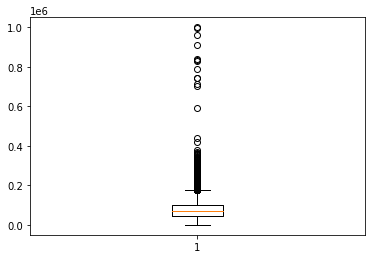

In [28]:
plt.boxplot(case_data['odometer_reading'])

#### `All we see numerous outliers so we will cap and cup it. The outlier above the mean are capped and the outlier below the mean are cupped`

For outlier treatment, we will replace the outliers with 99 percentile. If everything looks fine on boxplot then next step else we will replace the outliers with 98 percentile.

In [29]:
case_data['odometer_reading'][case_data['odometer_reading'] > case_data['odometer_reading'].quantile(0.97)] = case_data['odometer_reading'].quantile(0.97)

{'boxes': [<matplotlib.lines.Line2D at 0x7f8a91ec8cf8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8a91ed3550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8a91ed3dd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8a91ed3b00>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8a91ec8f60>,
  <matplotlib.lines.Line2D at 0x7f8a91ed3278>]}

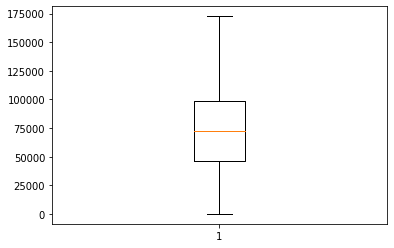

In [30]:
# So capped the data at 97 percentile
plt.boxplot(case_data['odometer_reading'])

#### Extracting month and year from inspectionStartTime as variables

(array([2.000e+00, 1.000e+00, 1.600e+01, 1.010e+02, 3.520e+02, 3.386e+03,
        4.910e+03, 8.511e+03, 6.000e+03, 3.028e+03]),
 array([1989., 1992., 1995., 1998., 2001., 2004., 2007., 2010., 2013.,
        2016., 2019.]),
 <BarContainer object of 10 artists>)

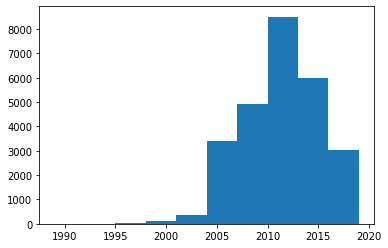

In [31]:
plt.hist(case_data['year'])

(array([7492., 2485., 2060., 2149., 1828., 1860., 1775., 1780., 1773.,
        3105.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

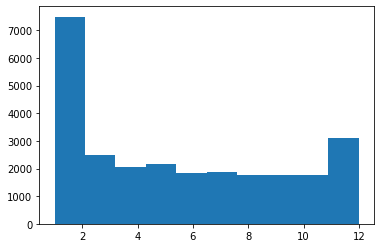

In [32]:
plt.hist(case_data['month'])

##### Looking at trend of both year and month variable are important and it have cyclic nature. So merging the year and month to create a datetime

In [33]:
case_data['day'] = 1

In [34]:
import datetime
case_data['date'] = case_data.apply(lambda x : datetime.date(int(x['year']), int(x['month']), int(x['day'])) , axis = 1 ) 

In [35]:
case_data['date'][0]

datetime.date(2008, 8, 1)

In [36]:
from datetime import datetime
from math import sin, cos, pi

In [37]:
days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]


def get_cycles(d):
    '''
    Get the cyclic properties of a datetime,
    represented as points on the unit circle.
    Arguments
    ---------
    d : datetime object
    Returns
    -------
    dictionary of sine and cosine tuples
    '''
    month = d.month - 1
    day = d.day - 1
    return {
        'month': sin(month / 12),
        'day': sin(day / days_in_month[month]),
        'weekday': sin(d.weekday() / 7),

    }

In [38]:
get_cycles(case_data['date'][0])

{'day': 0.0, 'month': 0.5508090958869698, 'weekday': 0.5408342133588315}

In [39]:
case_data['date_day'] = case_data['date'].apply(lambda x : get_cycles(x)['day'])
case_data['date_month'] = case_data['date'].apply(lambda x : get_cycles(x)['month'])
case_data['date_weekend'] = case_data['date'].apply(lambda x : get_cycles(x)['weekday'])

In [40]:
# Calculating cyclic variable of inspectionStartTime

In [41]:
case_data['inspectionStartTime_day'] = case_data['inspectionStartTime'].apply(lambda x : get_cycles(x)['day'])
case_data['inspectionStartTime_month'] = case_data['inspectionStartTime'].apply(lambda x : get_cycles(x)['month'])
case_data['inspectionStartTime_weekend'] = case_data['inspectionStartTime'].apply(lambda x : get_cycles(x)['weekday'])

In [42]:
# Dropping usless columns namely 'appointmentId', 'inspectionStartTime', 'year', 'month','day', 'date'

In [43]:
case_data.drop(['appointmentId', 'inspectionStartTime', 'year', 'month','day', 'date'], inplace = True, axis = 1)

In [44]:
numeric_variables = case_data[['odometer_reading', 'rating_engineTransmission', 'date_day',
       'date_month', 'date_weekend', 'inspectionStartTime_day',
       'inspectionStartTime_month', 'inspectionStartTime_weekend']]

In [45]:
# Concating both numeric and categorical variables

In [46]:
case_data_main = pd.concat([numeric_variables, categorical_variable], axis=1)

In [47]:
case_data_main.shape

(26307, 34)

### Pairwise correlation

In [48]:
correlation_data = case_data_main.corr().reset_index()

In [49]:
correlation_data.to_csv('correlation_data.csv')

<Figure size 640x480 with 0 Axes>

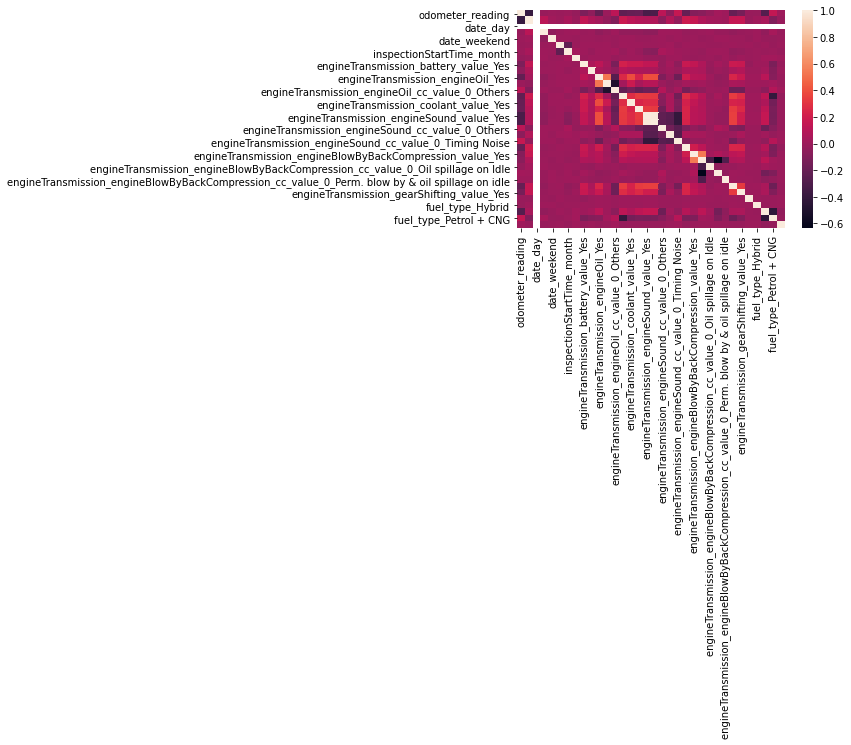

<Figure size 640x480 with 0 Axes>

In [50]:
from matplotlib.pyplot import figure
uniform_data = np.random.rand(10,12)
ax = sns.heatmap(case_data_main.corr())
figure(num = None ,  figsize = (8,6) , dpi = 80 , facecolor = 'w' , edgecolor = 'k')

#### `INFERENCE : When correlation is 1 then it is strongly positive and if its is -1 that means it is strongly negative

When two avriable are higly correlated the we remove one. In our case we arent removing anyy variable`

## Preparing training and test Data set

In [51]:
case_data_main.shape

(26307, 34)

In [52]:
case_data_main = case_data_main[case_data_main['rating_engineTransmission']!=0.5]

In [53]:
from sklearn.model_selection  import train_test_split

y = case_data_main['rating_engineTransmission']

X = case_data_main.drop(['rating_engineTransmission'], axis = 1)

In [54]:
# Checking the distribution of y
y.value_counts()

4.0    10152
3.5     5944
3.0     4379
4.5     2209
5.0     1623
1.0     1456
2.5      420
2.0      117
1.5        6
Name: rating_engineTransmission, dtype: int64

#### `This is a problem of multi-class classification with imbalanced data set`

In [55]:
X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size = 0.25 , random_state = 0)

In [56]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [57]:
#profile = ProfileReport(case_data, title="Pandas Profiling Report")

In [58]:
#profile.to_file("C24_EDA.html")

In [59]:
# Fitting Linear Model
from sklearn.ensemble import RandomForestRegressor

/Users/vivek/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [60]:
y.value_counts()

4.0    10152
3.5     5944
3.0     4379
4.5     2209
5.0     1623
1.0     1456
2.5      420
2.0      117
1.5        6
Name: rating_engineTransmission, dtype: int64

In [61]:
from sklearn.metrics import classification_report

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
regr = RandomForestClassifier()

In [64]:
from sklearn import preprocessing
from sklearn import utils

In [65]:
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)

In [66]:
y_train

array([3, 5, 2, ..., 6, 6, 6])

In [67]:
# Train the model using the training sets
regr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
# prediction of test sample values
y_pred = regr.predict(X_test)

In [69]:
y_pred

array([6, 4, 6, ..., 6, 4, 0])

In [70]:
y_test = lab_enc.transform(y_test)

In [71]:
y_test

array([6, 4, 5, ..., 6, 5, 0])

In [72]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.73      0.76      0.75       348
          1       0.00      0.00      0.00         1
          2       0.00      0.00      0.00        28
          3       0.09      0.02      0.03       111
          4       0.35      0.39      0.37      1064
          5       0.35      0.32      0.33      1473
          6       0.54      0.62      0.58      2577
          7       0.33      0.13      0.19       591
          8       0.60      0.70      0.65       384

avg / total       0.45      0.47      0.45      6577



/Users/vivek/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
